# Setup and Data Processing

In [1]:
from muon import prot as pt
import scanpy as sc
import muon as mu
import numpy as np

/Users/dennisbersenev/mambaforge/envs/muon/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data1 = "data/10k_Human_PBMC_TotalSeqC_5p_gemx_Multiplex_count_raw_molecule_info.h5"
data2 = "data/10k_Human_PBMC_TotalSeqC_5p_gemx_Multiplex_count_raw_feature_bc_matrix.h5"

adata = sc.read_10x_h5(data2, gex_only=False, backup_url=None)

# mu.read_10x_h5(data2)

adata.var_names_make_unique()
adata.layers["counts"] = adata.X.copy()

/Users/dennisbersenev/mambaforge/envs/muon/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
sc.pp.filter_genes(adata, min_counts=100) # number of times that RNA is present in the dataset
sc.pp.filter_cells(adata, min_counts=500) # number of biomolecules in each cell

protein = adata[:, adata.var["feature_types"] == "Antibody Capture"].copy()
rna = adata[:, adata.var["feature_types"] == "Gene Expression"].copy()

In [4]:
# Filtering cells not expressing both types of biomolecules
sc.pp.filter_cells(rna, min_counts=1)
sc.pp.filter_cells(protein, min_counts=1)
common_cells = protein.obs_names.intersection(rna.obs_names)
protein = protein[common_cells, :]
rna = rna[common_cells, :]

In [5]:
def min_max_normalize(X: np.ndarray):
    """
    Normalize a numpy array to the range [0, 1] using min-max normalization.

    Parameters:
    array (np.ndarray): The numpy array to normalize.

    Returns:
    np.ndarray: The normalized numpy array.
    """
    min_val = np.min(X)
    max_val = np.max(X)
    normalized_array = (X - min_val) / (max_val - min_val)
    return normalized_array

In [6]:
# RNA Normalization
sc.pp.log1p(rna)
# rna_norm = zscore_normalization_and_svd(rna.X.toarray(), n_components=300) # Same as ScLinear authors
rna_norm = min_max_normalize(rna.X.toarray()) # If skipping dim reduction step

/Users/dennisbersenev/mambaforge/envs/muon/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:372: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [7]:
# Protein Normalization 
mu.prot.pp.clr(protein)
protein_norm = protein.X.toarray()

# Saving mapping of 0-16 to protein names via array.
protein_names = [item.split('_')[0] for item in protein.var_names]

/Users/dennisbersenev/mambaforge/envs/muon/lib/python3.8/site-packages/muon/_prot/preproc.py:219: UserWarning: adata.X is sparse but not in CSC format. Converting to CSC.
  warn("adata.X is sparse but not in CSC format. Converting to CSC.")


# Visuals

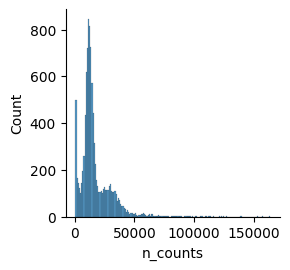

In [8]:
mu.pl.histogram(adata, ['n_counts'])

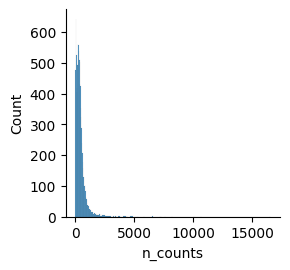

In [9]:
mu.pl.histogram(protein, ['n_counts'])

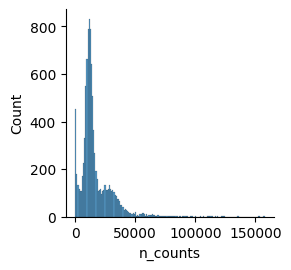

In [10]:
mu.pl.histogram(rna, ['n_counts'])

# Example Application: predicting surface proteins from RNA expression


<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en"><head>

<meta charset="utf-8">
<meta name="generator" content="quarto-1.4.527">

<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes">


<title>Open Problems in Single Cell Analysis - </title>
<style>
code{white-space: pre-wrap;}
span.smallcaps{font-variant: small-caps;}
div.columns{display: flex; gap: min(4vw, 1.5em);}
div.column{flex: auto; overflow-x: auto;}
div.hanging-indent{margin-left: 1.5em; text-indent: -1.5em;}
ul.task-list{list-style: none;}
ul.task-list li input[type="checkbox"] {
  width: 0.8em;
  margin: 0 0.8em 0.2em -1em; /* quarto-specific, see https://github.com/quarto-dev/quarto-cli/issues/4556 */ 
  vertical-align: middle;
}
</style>


<script src="site_libs/quarto-nav/quarto-nav.js"></script>
<script src="site_libs/quarto-nav/headroom.min.js"></script>
<script src="site_libs/clipboard/clipboard.min.js"></script>
<script src="site_libs/quarto-search/autocomplete.umd.js"></script>
<script src="site_libs/quarto-search/fuse.min.js"></script>
<script src="site_libs/quarto-search/quarto-search.js"></script>
<meta name="quarto:offset" content="./">
<link href="./images/icon.png" rel="icon" type="image/png">
<script src="site_libs/quarto-html/quarto.js"></script>
<script src="site_libs/quarto-html/popper.min.js"></script>
<script src="site_libs/quarto-html/tippy.umd.min.js"></script>
<script src="site_libs/quarto-html/anchor.min.js"></script>
<link href="site_libs/quarto-html/tippy.css" rel="stylesheet">
<link href="site_libs/quarto-html/quarto-syntax-highlighting.css" rel="stylesheet" class="quarto-color-scheme" id="quarto-text-highlighting-styles">
<link href="site_libs/quarto-html/quarto-syntax-highlighting-dark.css" rel="prefetch" class="quarto-color-scheme quarto-color-alternate" id="quarto-text-highlighting-styles">
<script src="site_libs/bootstrap/bootstrap.min.js"></script>
<link href="site_libs/bootstrap/bootstrap-icons.css" rel="stylesheet">
<link href="site_libs/bootstrap/bootstrap.min.css" rel="stylesheet" class="quarto-color-scheme" id="quarto-bootstrap" data-mode="light">
<link href="site_libs/bootstrap/bootstrap-dark.min.css" rel="prefetch" class="quarto-color-scheme quarto-color-alternate" id="quarto-bootstrap" data-mode="dark">
<script id="quarto-search-options" type="application/json">{
  "location": "navbar",
  "copy-button": false,
  "collapse-after": 3,
  "panel-placement": "end",
  "type": "overlay",
  "limit": 50,
  "keyboard-shortcut": [
    "f",
    "/",
    "s"
  ],
  "show-item-context": false,
  "language": {
    "search-no-results-text": "No results",
    "search-matching-documents-text": "matching documents",
    "search-copy-link-title": "Copy link to search",
    "search-hide-matches-text": "Hide additional matches",
    "search-more-match-text": "more match in this document",
    "search-more-matches-text": "more matches in this document",
    "search-clear-button-title": "Clear",
    "search-text-placeholder": "",
    "search-detached-cancel-button-title": "Cancel",
    "search-submit-button-title": "Submit",
    "search-label": "Search"
  }
}</script>

<script type="text/javascript">

(function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');
ga('create', 'UA-178400615-1', 'auto');

ga('send', {
  hitType: 'pageview',
  'anonymizeIp': true,
});
</script>
<style>html{ scroll-behavior: smooth; }</style>
<style>

      .quarto-title-block .quarto-title-banner {
        background-image: url(images/heros/home_hero.jpg);
background-size: cover;
      }
</style>


<link rel="stylesheet" href="style/styles.css">
<link rel="stylesheet" href="index.css">
</head>

<body class="nav-fixed">

<div id="quarto-search-results"></div>
  <header id="quarto-header" class="headroom fixed-top quarto-banner">
    <nav class="navbar navbar-expand-lg " data-bs-theme="dark">
      <div class="navbar-container container-fluid">
      <div class="navbar-brand-container mx-auto">
    <a class='navbar-brand navbar-brand-logo' href='/'>
    <img src="./images/logo.png" alt="" class="navbar-logo">
    </a>
  </div>
            <div id="quarto-search" class="" title="Search"></div>
          <button class="navbar-toggler" type="button" data-bs-toggle="collapse" data-bs-target="#navbarCollapse" aria-controls="navbarCollapse" aria-expanded="false" aria-label="Toggle navigation" onclick="if (window.quartoToggleHeadroom) { window.quartoToggleHeadroom(); }">
  <span class="navbar-toggler-icon"></span>
</button>
          <div class="collapse navbar-collapse" id="navbarCollapse">
            <ul class="navbar-nav navbar-nav-scroll me-auto">
  <li class="nav-item">
    <a aria-current='page' class='nav-link active' href='/'> 
<span class="menu-text">About</span></a>
  </li>  
  <li class="nav-item">
    <a class='nav-link' href='/datasets/'> 
<span class="menu-text">Datasets</span></a>
  </li>  
  <li class="nav-item">
    <a class='nav-link' href='/results/'> 
<span class="menu-text">Benchmarks</span></a>
  </li>  
  <li class="nav-item">
    <a class='nav-link' href='/events/'> 
<span class="menu-text">Events</span></a>
  </li>  
  <li class="nav-item">
    <a class='nav-link' href='/team/'> 
<span class="menu-text">Team</span></a>
  </li>  
  <li class="nav-item">
    <a class='nav-link' href='/documentation/'> 
<span class="menu-text">Documentation</span></a>
  </li>  
</ul>
            <ul class="navbar-nav navbar-nav-scroll ms-auto">
  <li class="nav-item compact">
    <a class="nav-link" href="https://github.com/openproblems-bio"> <i class="bi bi-github" role="img" aria-label="GitHub">
</i> 
<span class="menu-text"></span></a>
  </li>  
</ul>
          </div> <!-- /navcollapse -->
          <div class="quarto-navbar-tools">
  <a href="" class="quarto-color-scheme-toggle quarto-navigation-tool  px-1" onclick="window.quartoToggleColorScheme(); return false;" title="Toggle dark mode"><i class="bi"></i></a>
</div>
      </div> <!-- /container-fluid -->
    </nav>
</header>
<!-- content -->
<header id="title-block-header" class="quarto-title-block default page-columns page-full">
  <div class="quarto-title-banner page-columns page-full">
    <div class="quarto-title column-page">
      <h1 class="title"><img src="images/heros/home_hero_text.png" class="img-fluid" style="width:80.0%" alt="Open Problems in Single-Cell Analysis"></h1>
                      </div>
  </div>
    
  
  <div class="quarto-title-meta column-page">

      
    
      
    </div>
    
  
  </header><div id="quarto-content" class="quarto-container page-columns page-rows-contents page-layout-full page-navbar">
<!-- sidebar -->
<!-- margin-sidebar -->
    
<!-- main -->
<main class="content quarto-banner-title-block column-page" id="quarto-document-content">





<section id="benchmarking-formalized-challenges-in-single-cell-analysis" class="level1">
<h1>Benchmarking formalized challenges in single-cell analysis</h1>
<p>Computational biology is undergoing a revolution. Recent advances in microfluidic technology enable high-throughput and high-dimensional of individual cells at unprecedented scale. But there’s a catch.</p>
<p>Single-cell analysis is <em>hard</em>.</p>
<p>Modern single-cell datasets aren’t like traditional biological datasets. Not only are there more independent observations in each dataset, there are also more features being measured. This means that standard statistical techniques used in genomic analysis fail to capture the complexity present in single-cell datasets. Unlocking the potential of single-cell biology will require development of new methods for data analysis.</p>
<p>There are many challenges new methods need to overcome. A recent perspective identified <a href="https://doi.org/10.1186/s13059-020-1926-6"><strong>Eleven Grand Challenges in Single-Cell Data Science</strong>.</a> However, these challenges require formalization before method developers can attempt to solve them. Our goal is to formalize challenges such as these and create a living community-driven state-of-the-art benchmarking platform to facilitate development of single-cell methods.</p>
</section>
<section id="our-inspiration" class="level1">
<h1>Our inspiration</h1>
<p>We are inspired by the progress machine learning has made in computer vision, natural language processing (NLP), and individualized recommendation. Many of these advances were driven by competition among methods developers against standardized, well-defined computational tasks. Computer vision has <a href="https://www.image-net.org">ImageNet</a>, language processing has the <a href="https://www.statmt.org">Workshop on Statistical Machine Translation</a>, recommendation had the <a href="https://en.wikipedia.org/wiki/Netflix_Prize">Netflix Prize</a>. There are hundreds more challenges in machine learning that are catalogued on the <a href="https://paperswithcode.com/sota">Papers with Code State-of-the-art Leaderboards.</a></p>
<p>These challenges provide both direction for methods developers and provide a straightforward framework for evaluating methods. It’s not surprising that the biggest machine learning advances in the biological sciences have also occurred within the framework of formalized challenges. When DeepMind wanted to tackle protein folding prediction, they pursued state-of-the-art performance in the <a href="https://predictioncenter.org/">Critical Assessment of protein Structure Prediction</a>. Similarly, the <a href="https://dreamchallenges.org/open-challenges/">Dream Challenges</a> and Recursion Pharmaceuticals’ <a href="https://www.rxrx.ai/">RXRX competitions</a> strive to build on these large-scale high-reward challenges to drive innovation.</p>
<p>Of course, computational single-cell methods have seen a lot of innovation in the past years. This is partly driven by benchmarking efforts, that quantify progress and set goals. Yet, we noticed that many successful methods draw from innovations in computer vision and other areas of machine learning that are more mature. We want to promote this cross-fertilization to increase the pace of innovation for single-cell analysis, and enable machine learning scientists to use their skills to address relevant tasks in digital biomedical research.</p>
</section>
<section id="our-approach" class="level1">
<h1>Our approach</h1>
<p>We think there are four key traits that allow these challenges to drive innovation:</p>
<ol type="1">
<li>Tasks are formally defined with a clear mathematical interpretation<br>
</li>
<li>Easily accessible gold-standard datasets are publicly available in a ready-to-go standardized format<br>
</li>
<li>One or more quantitative metrics are defined for each task to judge success<br>
</li>
<li>State-of-the-art methods are ranked in a continuously updated leaderboard</li>
</ol>
<p>Our goal is to provide an open source, community driven, extensible platform for continuously updated benchmarking of formalized tasks in single-cell analysis. For example, we’re interested in ranking dimensionality reduction methods based on their ability to preserve global distances and comparing data denoising methods based on their ability to recover simulated mRNA undercounting.</p>
<p>Open Problems is hosted on GitHub. Benchmarks are evaluated using AWS thanks to generous support from the <a href="https://chanzuckerberg.com/science/">Chan Zuckerberg Initiative</a>. Leaderboards are hosted on our <a href="./results">Results</a> page. All code, methods, and leadership is driven by broad input from the scientific community.</p>
</section>
<section id="who-are-we" class="level1">
<h1>Who are we?</h1>
<p>We are machine learning scientists, computational biologists, and single-cell data analysts who formalize computational tasks in single-cell analysis and collaborate with molecular biologists to generate benchmarking datasets that challenge methods and method developers to perform ever better.</p>
<p>Meet the contributors on <a href="./team">our Team page</a>.</p>
</section>
<section id="join-us" class="level1">
<h1>Join us!</h1>
<p>We’d love for you to get involved.</p>
<p>You can start by <a href="https://docs.google.com/forms/d/e/1FAIpQLSe90Oky4-1b0HbdLsp5Yqo9juCd2mq-NlGHU9NHRW1ECok1xQ/viewform?usp=sf_link">joining our mailing list</a> to be the first to hear about updates.</p>
<p>Next, check out our <a href="./documentation">Contributing Guidelines</a>.</p>
<p>Finally, introduce yourself by giving us a 👋 on our <a href="https://discord.gg/sDE7cM4PN7">Discord Server</a>! You’ll find several groups of people here working on different tasks. Check out the different channels and see where you can contribute!</p>


</section>

</main> <!-- /main -->
<script id="quarto-html-after-body" type="application/javascript">
window.document.addEventListener("DOMContentLoaded", function (event) {
  const toggleBodyColorMode = (bsSheetEl) => {
    const mode = bsSheetEl.getAttribute("data-mode");
    const bodyEl = window.document.querySelector("body");
    if (mode === "dark") {
      bodyEl.classList.add("quarto-dark");
      bodyEl.classList.remove("quarto-light");
    } else {
      bodyEl.classList.add("quarto-light");
      bodyEl.classList.remove("quarto-dark");
    }
  }
  const toggleBodyColorPrimary = () => {
    const bsSheetEl = window.document.querySelector("link#quarto-bootstrap");
    if (bsSheetEl) {
      toggleBodyColorMode(bsSheetEl);
    }
  }
  toggleBodyColorPrimary();  
  const disableStylesheet = (stylesheets) => {
    for (let i=0; i < stylesheets.length; i++) {
      const stylesheet = stylesheets[i];
      stylesheet.rel = 'prefetch';
    }
  }
  const enableStylesheet = (stylesheets) => {
    for (let i=0; i < stylesheets.length; i++) {
      const stylesheet = stylesheets[i];
      stylesheet.rel = 'stylesheet';
    }
  }
  const manageTransitions = (selector, allowTransitions) => {
    const els = window.document.querySelectorAll(selector);
    for (let i=0; i < els.length; i++) {
      const el = els[i];
      if (allowTransitions) {
        el.classList.remove('notransition');
      } else {
        el.classList.add('notransition');
      }
    }
  }
  const toggleGiscusIfUsed = (isAlternate, darkModeDefault) => {
    const baseTheme = document.querySelector('#giscus-base-theme')?.value ?? 'light';
    const alternateTheme = document.querySelector('#giscus-alt-theme')?.value ?? 'dark';
    let newTheme = '';
    if(darkModeDefault) {
      newTheme = isAlternate ? baseTheme : alternateTheme;
    } else {
      newTheme = isAlternate ? alternateTheme : baseTheme;
    }
    const changeGiscusTheme = () => {
      // From: https://github.com/giscus/giscus/issues/336
      const sendMessage = (message) => {
        const iframe = document.querySelector('iframe.giscus-frame');
        if (!iframe) return;
        iframe.contentWindow.postMessage({ giscus: message }, 'https://giscus.app');
      }
      sendMessage({
        setConfig: {
          theme: newTheme
        }
      });
    }
    const isGiscussLoaded = window.document.querySelector('iframe.giscus-frame') !== null;
    if (isGiscussLoaded) {
      changeGiscusTheme();
    }
  }
  const toggleColorMode = (alternate) => {
    // Switch the stylesheets
    const alternateStylesheets = window.document.querySelectorAll('link.quarto-color-scheme.quarto-color-alternate');
    manageTransitions('#quarto-margin-sidebar .nav-link', false);
    if (alternate) {
      enableStylesheet(alternateStylesheets);
      for (const sheetNode of alternateStylesheets) {
        if (sheetNode.id === "quarto-bootstrap") {
          toggleBodyColorMode(sheetNode);
        }
      }
    } else {
      disableStylesheet(alternateStylesheets);
      toggleBodyColorPrimary();
    }
    manageTransitions('#quarto-margin-sidebar .nav-link', true);
    // Switch the toggles
    const toggles = window.document.querySelectorAll('.quarto-color-scheme-toggle');
    for (let i=0; i < toggles.length; i++) {
      const toggle = toggles[i];
      if (toggle) {
        if (alternate) {
          toggle.classList.add("alternate");     
        } else {
          toggle.classList.remove("alternate");
        }
      }
    }
    // Hack to workaround the fact that safari doesn't
    // properly recolor the scrollbar when toggling (#1455)
    if (navigator.userAgent.indexOf('Safari') > 0 && navigator.userAgent.indexOf('Chrome') == -1) {
      manageTransitions("body", false);
      window.scrollTo(0, 1);
      setTimeout(() => {
        window.scrollTo(0, 0);
        manageTransitions("body", true);
      }, 40);  
    }
  }
  const isFileUrl = () => { 
    return window.location.protocol === 'file:';
  }
  const hasAlternateSentinel = () => {  
    let styleSentinel = getColorSchemeSentinel();
    if (styleSentinel !== null) {
      return styleSentinel === "alternate";
    } else {
      return false;
    }
  }
  const setStyleSentinel = (alternate) => {
    const value = alternate ? "alternate" : "default";
    if (!isFileUrl()) {
      window.localStorage.setItem("quarto-color-scheme", value);
    } else {
      localAlternateSentinel = value;
    }
  }
  const getColorSchemeSentinel = () => {
    if (!isFileUrl()) {
      const storageValue = window.localStorage.getItem("quarto-color-scheme");
      return storageValue != null ? storageValue : localAlternateSentinel;
    } else {
      return localAlternateSentinel;
    }
  }
  const darkModeDefault = false;
  let localAlternateSentinel = darkModeDefault ? 'alternate' : 'default';
  // Dark / light mode switch
  window.quartoToggleColorScheme = () => {
    // Read the current dark / light value 
    let toAlternate = !hasAlternateSentinel();
    toggleColorMode(toAlternate);
    setStyleSentinel(toAlternate);
    toggleGiscusIfUsed(toAlternate, darkModeDefault);
  };
  // Ensure there is a toggle, if there isn't float one in the top right
  if (window.document.querySelector('.quarto-color-scheme-toggle') === null) {
    const a = window.document.createElement('a');
    a.classList.add('top-right');
    a.classList.add('quarto-color-scheme-toggle');
    a.href = "";
    a.onclick = function() { try { window.quartoToggleColorScheme(); } catch {} return false; };
    const i = window.document.createElement("i");
    i.classList.add('bi');
    a.appendChild(i);
    window.document.body.appendChild(a);
  }
  // Switch to dark mode if need be
  if (hasAlternateSentinel()) {
    toggleColorMode(true);
  } else {
    toggleColorMode(false);
  }
  const icon = "";
  const anchorJS = new window.AnchorJS();
  anchorJS.options = {
    placement: 'right',
    icon: icon
  };
  anchorJS.add('.anchored');
  const isCodeAnnotation = (el) => {
    for (const clz of el.classList) {
      if (clz.startsWith('code-annotation-')) {                     
        return true;
      }
    }
    return false;
  }
  const clipboard = new window.ClipboardJS('.code-copy-button', {
    text: function(trigger) {
      const codeEl = trigger.previousElementSibling.cloneNode(true);
      for (const childEl of codeEl.children) {
        if (isCodeAnnotation(childEl)) {
          childEl.remove();
        }
      }
      return codeEl.innerText;
    }
  });
  clipboard.on('success', function(e) {
    // button target
    const button = e.trigger;
    // don't keep focus
    button.blur();
    // flash "checked"
    button.classList.add('code-copy-button-checked');
    var currentTitle = button.getAttribute("title");
    button.setAttribute("title", "Copied!");
    let tooltip;
    if (window.bootstrap) {
      button.setAttribute("data-bs-toggle", "tooltip");
      button.setAttribute("data-bs-placement", "left");
      button.setAttribute("data-bs-title", "Copied!");
      tooltip = new bootstrap.Tooltip(button, 
        { trigger: "manual", 
          customClass: "code-copy-button-tooltip",
          offset: [0, -8]});
      tooltip.show();    
    }
    setTimeout(function() {
      if (tooltip) {
        tooltip.hide();
        button.removeAttribute("data-bs-title");
        button.removeAttribute("data-bs-toggle");
        button.removeAttribute("data-bs-placement");
      }
      button.setAttribute("title", currentTitle);
      button.classList.remove('code-copy-button-checked');
    }, 1000);
    // clear code selection
    e.clearSelection();
  });
    var localhostRegex = new RegExp(/^(?:http|https):\/\/localhost\:?[0-9]*\//);
    var mailtoRegex = new RegExp(/^mailto:/);
      var filterRegex = new RegExp("^(?:http:|https:)\/\/(openproblems\.bio|[^.]*--openproblems\.netlify\.app)");
    var isInternal = (href) => {
        return filterRegex.test(href) || localhostRegex.test(href) || mailtoRegex.test(href);
    }
    // Inspect non-navigation links and adorn them if external
 	var links = window.document.querySelectorAll('a[href]:not(.nav-link):not(.navbar-brand):not(.toc-action):not(.sidebar-link):not(.sidebar-item-toggle):not(.pagination-link):not(.no-external):not([aria-hidden]):not(.dropdown-item):not(.quarto-navigation-tool)');
    for (var i=0; i<links.length; i++) {
      const link = links[i];
      if (!isInternal(link.href)) {
          // target, if specified
          link.setAttribute("target", "_blank");
          if (link.getAttribute("rel") === null) {
            link.setAttribute("rel", "noopener");
          }
      }
    }
  function tippyHover(el, contentFn, onTriggerFn, onUntriggerFn) {
    const config = {
      allowHTML: true,
      maxWidth: 500,
      delay: 100,
      arrow: false,
      appendTo: function(el) {
          return el.parentElement;
      },
      interactive: true,
      interactiveBorder: 10,
      theme: 'quarto',
      placement: 'bottom-start',
    };
    if (contentFn) {
      config.content = contentFn;
    }
    if (onTriggerFn) {
      config.onTrigger = onTriggerFn;
    }
    if (onUntriggerFn) {
      config.onUntrigger = onUntriggerFn;
    }
    window.tippy(el, config); 
  }
  const noterefs = window.document.querySelectorAll('a[role="doc-noteref"]');
  for (var i=0; i<noterefs.length; i++) {
    const ref = noterefs[i];
    tippyHover(ref, function() {
      // use id or data attribute instead here
      let href = ref.getAttribute('data-footnote-href') || ref.getAttribute('href');
      try { href = new URL(href).hash; } catch {}
      const id = href.replace(/^#\/?/, "");
      const note = window.document.getElementById(id);
      return note.innerHTML;
    });
  }
  const xrefs = window.document.querySelectorAll('a.quarto-xref');
  const processXRef = (id, note) => {
    // Strip column container classes
    const stripColumnClz = (el) => {
      el.classList.remove("page-full", "page-columns");
      if (el.children) {
        for (const child of el.children) {
          stripColumnClz(child);
        }
      }
    }
    stripColumnClz(note)
    if (id === null || id.startsWith('sec-')) {
      // Special case sections, only their first couple elements
      const container = document.createElement("div");
      if (note.children && note.children.length > 2) {
        container.appendChild(note.children[0].cloneNode(true));
        for (let i = 1; i < note.children.length; i++) {
          const child = note.children[i];
          if (child.tagName === "P" && child.innerText === "") {
            continue;
          } else {
            container.appendChild(child.cloneNode(true));
            break;
          }
        }
        if (window.Quarto?.typesetMath) {
          window.Quarto.typesetMath(container);
        }
        return container.innerHTML
      } else {
        if (window.Quarto?.typesetMath) {
          window.Quarto.typesetMath(note);
        }
        return note.innerHTML;
      }
    } else {
      // Remove any anchor links if they are present
      const anchorLink = note.querySelector('a.anchorjs-link');
      if (anchorLink) {
        anchorLink.remove();
      }
      if (window.Quarto?.typesetMath) {
        window.Quarto.typesetMath(note);
      }
      return note.innerHTML;
    }
  }
  for (var i=0; i<xrefs.length; i++) {
    const xref = xrefs[i];
    tippyHover(xref, undefined, function(instance) {
      instance.disable();
      let url = xref.getAttribute('href');
      let hash = undefined; 
      if (url.startsWith('#')) {
        hash = url;
      } else {
        try { hash = new URL(url).hash; } catch {}
      }
      if (hash) {
        const id = hash.replace(/^#\/?/, "");
        const note = window.document.getElementById(id);
        if (note !== null) {
          try {
            const html = processXRef(id, note.cloneNode(true));
            instance.setContent(html);
          } finally {
            instance.enable();
            instance.show();
          }
        } else {
          // See if we can fetch this
          fetch(url.split('#')[0])
          .then(res => res.text())
          .then(html => {
            const parser = new DOMParser();
            const htmlDoc = parser.parseFromString(html, "text/html");
            const note = htmlDoc.getElementById(id);
            if (note !== null) {
              const html = processXRef(id, note);
              instance.setContent(html);
            } 
          }).finally(() => {
            instance.enable();
            instance.show();
          });
        }
      } else {
        // See if we can fetch a full url (with no hash to target)
        // This is a special case and we should probably do some content thinning / targeting
        fetch(url)
        .then(res => res.text())
        .then(html => {
          const parser = new DOMParser();
          const htmlDoc = parser.parseFromString(html, "text/html");
          const note = htmlDoc.querySelector('main.content');
          if (note !== null) {
            // This should only happen for chapter cross references
            // (since there is no id in the URL)
            // remove the first header
            if (note.children.length > 0 && note.children[0].tagName === "HEADER") {
              note.children[0].remove();
            }
            const html = processXRef(null, note);
            instance.setContent(html);
          } 
        }).finally(() => {
          instance.enable();
          instance.show();
        });
      }
    }, function(instance) {
    });
  }
      let selectedAnnoteEl;
      const selectorForAnnotation = ( cell, annotation) => {
        let cellAttr = 'data-code-cell="' + cell + '"';
        let lineAttr = 'data-code-annotation="' +  annotation + '"';
        const selector = 'span[' + cellAttr + '][' + lineAttr + ']';
        return selector;
      }
      const selectCodeLines = (annoteEl) => {
        const doc = window.document;
        const targetCell = annoteEl.getAttribute("data-target-cell");
        const targetAnnotation = annoteEl.getAttribute("data-target-annotation");
        const annoteSpan = window.document.querySelector(selectorForAnnotation(targetCell, targetAnnotation));
        const lines = annoteSpan.getAttribute("data-code-lines").split(",");
        const lineIds = lines.map((line) => {
          return targetCell + "-" + line;
        })
        let top = null;
        let height = null;
        let parent = null;
        if (lineIds.length > 0) {
            //compute the position of the single el (top and bottom and make a div)
            const el = window.document.getElementById(lineIds[0]);
            top = el.offsetTop;
            height = el.offsetHeight;
            parent = el.parentElement.parentElement;
          if (lineIds.length > 1) {
            const lastEl = window.document.getElementById(lineIds[lineIds.length - 1]);
            const bottom = lastEl.offsetTop + lastEl.offsetHeight;
            height = bottom - top;
          }
          if (top !== null && height !== null && parent !== null) {
            // cook up a div (if necessary) and position it 
            let div = window.document.getElementById("code-annotation-line-highlight");
            if (div === null) {
              div = window.document.createElement("div");
              div.setAttribute("id", "code-annotation-line-highlight");
              div.style.position = 'absolute';
              parent.appendChild(div);
            }
            div.style.top = top - 2 + "px";
            div.style.height = height + 4 + "px";
            div.style.left = 0;
            let gutterDiv = window.document.getElementById("code-annotation-line-highlight-gutter");
            if (gutterDiv === null) {
              gutterDiv = window.document.createElement("div");
              gutterDiv.setAttribute("id", "code-annotation-line-highlight-gutter");
              gutterDiv.style.position = 'absolute';
              const codeCell = window.document.getElementById(targetCell);
              const gutter = codeCell.querySelector('.code-annotation-gutter');
              gutter.appendChild(gutterDiv);
            }
            gutterDiv.style.top = top - 2 + "px";
            gutterDiv.style.height = height + 4 + "px";
          }
          selectedAnnoteEl = annoteEl;
        }
      };
      const unselectCodeLines = () => {
        const elementsIds = ["code-annotation-line-highlight", "code-annotation-line-highlight-gutter"];
        elementsIds.forEach((elId) => {
          const div = window.document.getElementById(elId);
          if (div) {
            div.remove();
          }
        });
        selectedAnnoteEl = undefined;
      };
        // Handle positioning of the toggle
    window.addEventListener(
      "resize",
      throttle(() => {
        elRect = undefined;
        if (selectedAnnoteEl) {
          selectCodeLines(selectedAnnoteEl);
        }
      }, 10)
    );
    function throttle(fn, ms) {
    let throttle = false;
    let timer;
      return (...args) => {
        if(!throttle) { // first call gets through
            fn.apply(this, args);
            throttle = true;
        } else { // all the others get throttled
            if(timer) clearTimeout(timer); // cancel #2
            timer = setTimeout(() => {
              fn.apply(this, args);
              timer = throttle = false;
            }, ms);
        }
      };
    }
      // Attach click handler to the DT
      const annoteDls = window.document.querySelectorAll('dt[data-target-cell]');
      for (const annoteDlNode of annoteDls) {
        annoteDlNode.addEventListener('click', (event) => {
          const clickedEl = event.target;
          if (clickedEl !== selectedAnnoteEl) {
            unselectCodeLines();
            const activeEl = window.document.querySelector('dt[data-target-cell].code-annotation-active');
            if (activeEl) {
              activeEl.classList.remove('code-annotation-active');
            }
            selectCodeLines(clickedEl);
            clickedEl.classList.add('code-annotation-active');
          } else {
            // Unselect the line
            unselectCodeLines();
            clickedEl.classList.remove('code-annotation-active');
          }
        });
      }
  const findCites = (el) => {
    const parentEl = el.parentElement;
    if (parentEl) {
      const cites = parentEl.dataset.cites;
      if (cites) {
        return {
          el,
          cites: cites.split(' ')
        };
      } else {
        return findCites(el.parentElement)
      }
    } else {
      return undefined;
    }
  };
  var bibliorefs = window.document.querySelectorAll('a[role="doc-biblioref"]');
  for (var i=0; i<bibliorefs.length; i++) {
    const ref = bibliorefs[i];
    const citeInfo = findCites(ref);
    if (citeInfo) {
      tippyHover(citeInfo.el, function() {
        var popup = window.document.createElement('div');
        citeInfo.cites.forEach(function(cite) {
          var citeDiv = window.document.createElement('div');
          citeDiv.classList.add('hanging-indent');
          citeDiv.classList.add('csl-entry');
          var biblioDiv = window.document.getElementById('ref-' + cite);
          if (biblioDiv) {
            citeDiv.innerHTML = biblioDiv.innerHTML;
          }
          popup.appendChild(citeDiv);
        });
        return popup.innerHTML;
      });
    }
  }
});
</script>
</div> <!-- /content -->
<footer class="footer">
  <div class="nav-footer">
    <div class="nav-footer-left">
<p>© Open Problems 2023 with all data licensed under <a href="https://creativecommons.org/licenses/by/2.0/">CC-BY</a>.</p>
</div>   
    <div class="nav-footer-center">
      &nbsp;
    <div class="toc-actions"><ul><li><a href="https://github.com/openproblems-bio/website/edit/main/index.qmd" class="toc-action"><i class="bi bi-github"></i>Edit this page</a></li><li><a href="https://github.com/openproblems-bio/website/issues/new" class="toc-action"><i class="bi empty"></i>Report an issue</a></li></ul></div></div>
    <div class="nav-footer-right">
      &nbsp;
    </div>
  </div>
</footer>




<script src="site_libs/quarto-html/zenscroll-min.js"></script>
</body></html>

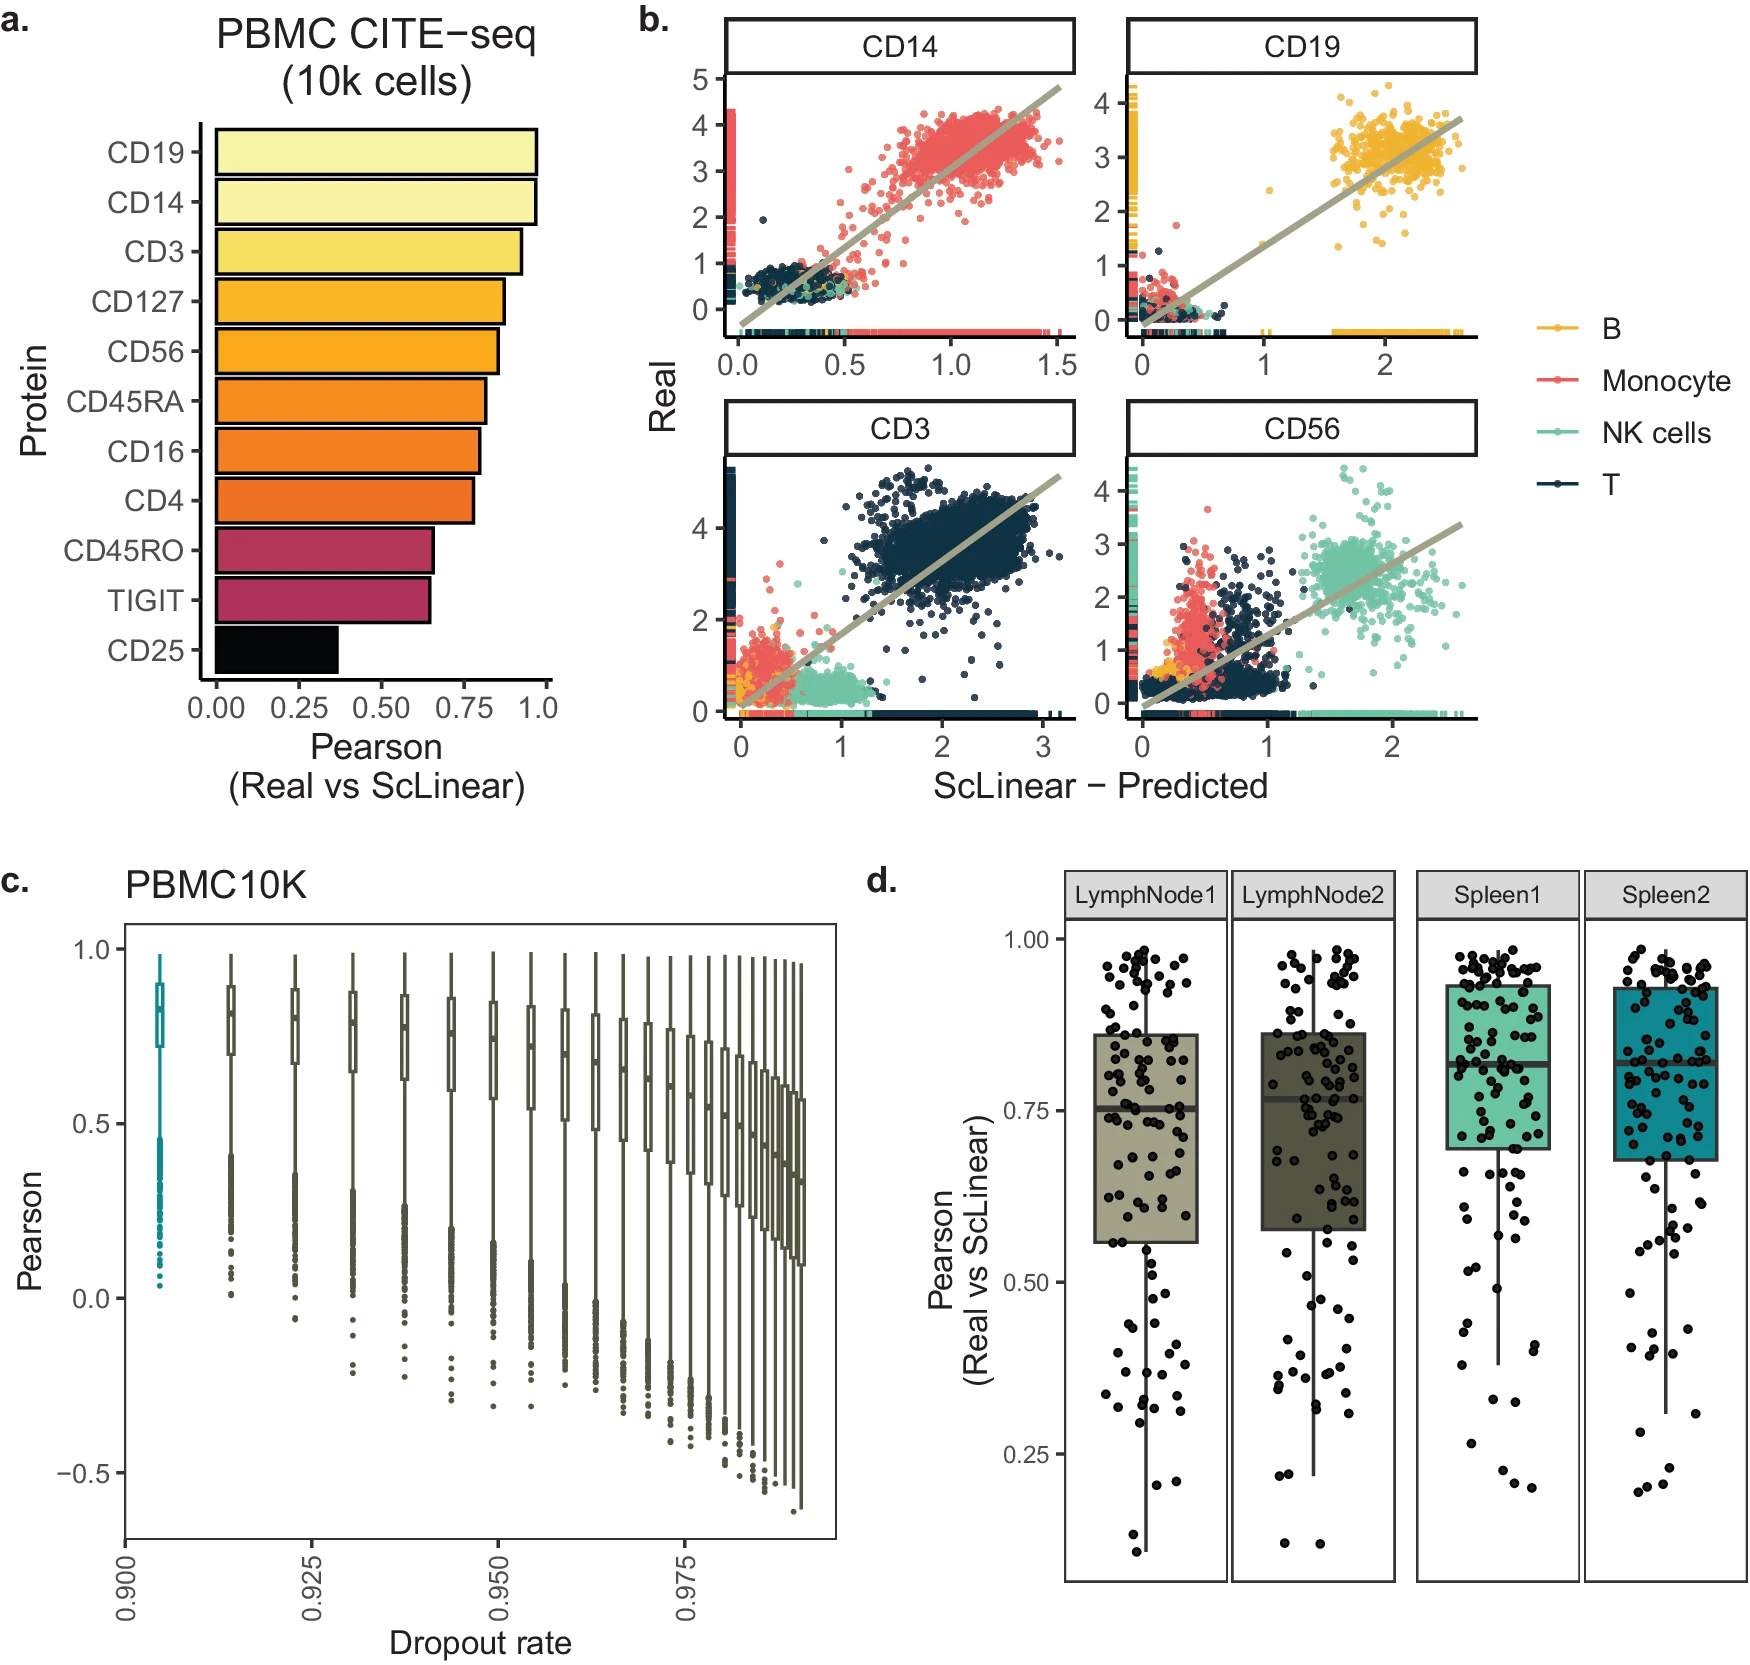